In [5]:
# Playing with labeled image data
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Define directories
base_dir = '/Users/jetcalz07/Desktop/MIDS/W281_CV/logo_detection_w281/'
image_dir = base_dir + 'data/images/'
bbox_dir = base_dir + 'data/yolofinalset/obj_train_data/'
ref_dir = base_dir + 'data/logo_references/adidas/'

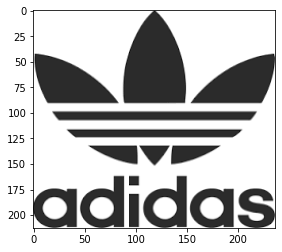

In [6]:
# Load list of train images
with open(base_dir + 'data/yolofinalset/train.txt') as f:
    train = f.readlines()
train = [x.replace('\n', '').split('/')[-1] for x in train]

# Load adidas image, template, bounding boxes
z = 0
img_file = image_dir + train[z]
ref_file = ref_dir + os.listdir(ref_dir)[0] 
img_bbox = bbox_dir +  train[z].replace('.jpg', '.txt')

# Read in image and bounding box info, format
im = plt.imread(ref_file)
img = im[:, :, 0].copy()

plt.imshow(img, cmap='gray')

In [9]:
# Goal: Transform image by applying homography to tilt it 15 degrees forward, backward, left, right (maybe then combos?)
def rotate_3d(img, x=0.0, y=0.0, z=0.0):

    #2d to 3d (projection)
    proj2dto3d = np.array([[1,0,-img.shape[1]/2],
                        [0,1,-img.shape[0]/2],
                        [0,0,0],
                        [0,0,1]],np.float32)

    proj3dto2d = np.array([ [200,0,img.shape[1]/2,0],
                            [0,200,img.shape[0]/2,0],
                            [0,0,1,0] ],np.float32)

    trans= np.array([[1,0,0,0],
                    [0,1,0,0],
                    [0,0,1,400], #400 to move the image back in z axis so full logo shown after y-rotation
                    [0,0,0,1]],np.float32)

    # Define rotation
    ax = float(x * (math.pi / 180.0))
    ay = float(y * (math.pi / 180.0)) 
    az = float(z * (math.pi / 180.0))
    rx   = np.array([[1,0,0,0],
                    [0,math.cos(ax),-math.sin(ax),0],
                    [0,math.sin(ax),math.cos(ax),0],
                    [0,0,0,1]],np.float32)  #0
    ry   = np.array([[math.cos(ay),0,-math.sin(ay),0],
                    [0,1,0,0],
                    [math.sin(ay),0,math.cos(ay),0],
                    [0,0,0,1]],np.float32)
    rz   = np.array([[math.cos(az),-math.sin(az),0,0],
                    [math.sin(az),math.cos(az),0,0],
                    [0,0,1,0],
                    [0,0,0,1]],np.float32)

    # Execute rotation
    r =rx.dot(ry).dot(rz)
    final = proj3dto2d.dot(trans.dot(r.dot(proj2dto3d)))
    dst = cv2.warpPerspective(img, final,(img.shape[1],img.shape[0]),None,cv2.INTER_LINEAR
                                ,cv2.BORDER_CONSTANT,(255,255,255))

    return dst

# define degree rotation
dst = rotate_3d(img, x=0.0, y=45.0, z=45.0)
cv2.imshow("dst",dst)
cv2.waitKey(25)

-1